In [1]:
import pandas as pd
import os
import shutil

In [2]:
#Create the data for positive samples 

FILE_PATH = "covid-chestxray-dataset-master\metadata.csv"
IMAGE_PATH = "covid-chestxray-dataset-master\images"

In [3]:
df = pd.read_csv(FILE_PATH)
print(df.shape)

(950, 30)


In [4]:
df.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


# Load Datasets

In [5]:
TARGET_DIR = "Dataset/Train/Covid"

if not os.path.exists(TARGET_DIR):
    os.mkdir(TARGET_DIR)
    print("Covid FOlder Created")

In [6]:
#Copy COVID-19 images with view point PA from Downloaded directory to Target Directory
cnt = 0
for(i,row) in df.iterrows():
    if row["finding"] == "COVID-19" and row["view"] =="PA":
        filename = row["filename"]
        image_path = os.path.join(IMAGE_PATH,filename) #IMAGE_PATH + filename
        image_copy_path = os.path.join(TARGET_DIR,filename) #TARGET_DIR + filename
        shutil.copy2(image_path,image_copy_path) #Copy From IMAGE_PATH to TARGET_DIrectory
       # print("Moving Image",cnt)
        cnt+=1
# print(cnt)

In [6]:
# Sampling of Images from Kaggle Data,As we have 143 around covid images so we will have 143 around normal images of xray

import random
KAGGLE_FILE_PATH = "chest_xray\\train\\NORMAL"
TARGET_NORMAL_DIR = "C:\Users\thode\OneDrive\Desktop\Covid19-Detection-Using-Chest-X-Ray-master\Dataset\Train\Normal"
if not os.path.exists(TARGET_NORMAL_DIR):
    os.mkdir(TARGET_NORMAL_DIR)
    print("Normal Folder Created")
    
image_names = os.listdir(KAGGLE_FILE_PATH) # Contains list of all image names
# images_names
random.shuffle(image_names) # it will randomly shuffle names in list

for i in range(144):
    image_name = image_names[i]
    image_path = os.path.join(KAGGLE_FILE_PATH,image_name)
    
    target_path = os.path.join(TARGET_NORMAL_DIR,image_name)
    shutil.copy2(image_path,target_path)
#   print("Moved",i)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'chest_xray\\train\\NORMAL'

In [ ]:
TRAIN_PATH = "Dataset/Train"
VAL_PATH = "Dataset/Val"

# **Importing Required Libraries**

In [3]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from tensorflow.keras.utils import load_img, img_to_array

# **Building Architecture**


In [20]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy,optimizer = "adam",metrics=["accuracy"])


In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_6 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 110, 110, 64)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                  

# **Train From Scratch**

## *Data Augmentation*

In [22]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
test_dataset = image.ImageDataGenerator(rescale = 1./255)


In [23]:
train_generator = train_datagen.flow_from_directory(
    'Dataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 392 images belonging to 2 classes.


In [24]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [25]:
validation_generator = test_dataset.flow_from_directory(
    'Dataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 16 images belonging to 2 classes.


# **Fit The Model**

In [26]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

C:\Users\anass\AppData\Local\Temp\ipykernel_19988\430255416.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/10
8/8 [==============================] - 56s 6s/step - loss: 0.8239 - accuracy: 0.4961 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 39s 5s/step - loss: 0.6907 - accuracy: 0.5352
Epoch 3/10
8/8 [==============================] - 40s 5s/step - loss: 0.6685 - accuracy: 0.6289
Epoch 4/10
8/8 [==============================] - 36s 4s/step - loss: 0.5963 - accuracy: 0.7155
Epoch 5/10
8/8 [==============================] - 34s 4s/step - loss: 0.5853 - accuracy: 0.7328
Epoch 6/10
8/8 [==============================] - 36s 4s/step - loss: 0.5372 - accuracy: 0.7457
Epoch 7/10
8/8 [==============================] - 38s 5s/step - loss: 0.3663 - accuracy: 0.8320
Epoch 8/10
8/8 [==============================] - 41s 5s/step - loss: 0.3023 - accuracy: 0.8789
Epoch 9/10
8/8 [==============================] - 35s 4s/step - loss: 0.2797 - accuracy: 0.9181
Epoch 10/10
8/8 [==============================] - 35s 4s/step - loss: 0.3440 - accuracy: 0.86

## *Loss is very less and accuracy is on point*

In [27]:
model.save("Detection_Covid_19.h5")

In [28]:
# model.evaluate_generator(train_generator)

In [29]:
# model.evaluate_generator(validation_generator)

# **Test Images**

In [4]:
model = load_model("Detection_Covid_19.h5")

In [5]:
import os

In [8]:
train_generator.class_indices

NameError: name 'train_generator' is not defined

# **Confusion Matrix**

In [12]:
y_actual = []
y_test = []

In [13]:
for i in os.listdir("./Dataset/Val/Normal"):
  img = load_img("./Dataset/Val/Normal/"+i,target_size=(224,224))
  img = img_to_array(img)
  img = np.expand_dims(img,axis=0)
  # p = model.predict_classes(img)
  p = model.predict(img) 
  classes_x=np.argmax(p,axis=1)
  y_test.append(p[0,0])
  y_actual.append(1)
  # print(p)
  # print(classes_x)
  # print("")
# print(y_test)
# print(y_actual)

1/1 [==============================] - 0s 55ms/step


In [14]:
for i in os.listdir("./Dataset/Val/PNEUMONIA"):
  img = load_img("./Dataset/Val/PNEUMONIA/"+i,target_size=(224,224))
  img = img_to_array(img)
  img = np.expand_dims(img,axis=0)
  # p = model.predict_classes(img)
  p = model.predict(img) 
  classes_x=np.argmax(p,axis=1)
  # print(p)
  # print(classes_x)
  # print("")
  y_test.append(p[0,0])
  y_actual.append(0)
# print(y_test)
# print(y_actual)

1/1 [==============================] - 0s 50ms/step


In [15]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [16]:
import sklearn
from sklearn.metrics import confusion_matrix

In [17]:
print(y_actual)
print(y_test)
cm = confusion_matrix(y_actual,y_test)

[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [18]:
import seaborn as sns

In [91]:
# sns.heatmap(cm,cmap = "plasma" , annot=True)

In [19]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
class_names = ["Covid","Normal"]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap="plasma"):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## ***Confusion Matrix***

Confusion matrix, without normalization
[[10  0]
 [ 0 10]]


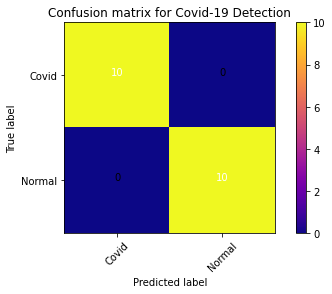

In [20]:
plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix for Covid-19 Detection',cmap="plasma")


# **List all data in history**

In [21]:

history = hist
print(history.history.keys())

NameError: name 'hist' is not defined

# **Summarize history for accuracy**

In [22]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


NameError: name 'history' is not defined

# **Summarize history for loss**

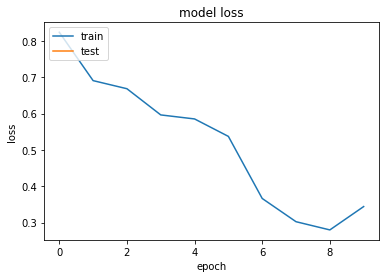

In [96]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Predictions from X-Ray Images**

1/1 [==============================] - 0s 51ms/step
This Xray Image is of positive covid-19 patient
Prediction Of Our Model :  Positive For Covid-19


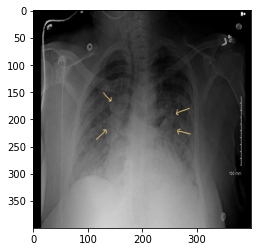

In [28]:
import numpy as np
# from google.colab.patches import cv2_imshow
import cv2
from keras.preprocessing import image
from tensorflow.keras.utils import load_img, img_to_array

# xtest_image = load_img('Dataset/Prediction/ryct.2020200034.fig5-day7.jpeg', target_size = (224, 224))
xtest_image = load_img('article_river_1a00a3c07ea311eab70491c6fb93d336-figure-2.png', target_size = (224, 224))
xtest_image = img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
# results = model.predict_classes(xtest_image)

predict_x = model.predict(xtest_image)
classes_x = np.argmax(predict_x,axis=1)

results = model.predict(xtest_image)

# training_set.class_indices
# imggg = cv2.imread('Dataset/Prediction/ryct.2020200034.fig5-day7.jpeg')
imggg = cv2.imread('article_river_1a00a3c07ea311eab70491c6fb93d336-figure-2.png')
print("This Xray Image is of positive covid-19 patient")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))
plt.imshow(imggg)
# cv2_imshow(imggg)
# print(results)
if results[0][0] == 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)

1/1 [==============================] - 0s 52ms/step
This Xray Image is of Negative covid-19 patient
Prediction Of Our Model :  Negative for Covid-19


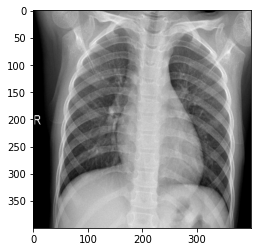

In [27]:
import numpy as np
# from google.colab.patches import cv2_imshow
from keras.preprocessing import image
xtest_image = load_img('NORMAL2-IM-0380-0001.jpeg', target_size = (224, 224))
xtest_image = img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
# results = model.predict_classes(xtest_image)

predict_x = model.predict(xtest_image)
classes_x = np.argmax(predict_x,axis=1)

results = model.predict(xtest_image)
# training_set.class_indices

imggg = cv2.imread('NORMAL2-IM-0380-0001.jpeg')
print("This Xray Image is of Negative covid-19 patient")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))

plt.imshow(imggg)
# cv2_imshow(imggg)
# print(results)
if results[0][0] == 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)